creation de base de données

In [9]:
# Bloc 1 : imports
import numpy as np
import pandas as pd

# Bloc 2 : paramètres
n_clients = 450      # nombre de clients
n_stations = 45      # nombre de stations de recharge
n_depots = 5         # nombre de dépôts
total_nodes = n_clients + n_stations + n_depots

np.random.seed(42)   # pour reproductibilité

# Bloc 3 : génération des coordonnées
# On suppose un plan 2D de 0 à 100 pour x et y
coords = np.random.uniform(0, 100, size=(total_nodes, 2))

# Bloc 4 : génération des types de noeuds
types = (['Depot']*n_depots) + (['Client']*n_clients) + (['Station']*n_stations)

# Bloc 5 : génération de la demande (0 pour depot et station)
demands = [0]*n_depots + list(np.random.randint(1, 10, size=n_clients)) + [0]*n_stations

# Bloc 6 : création du DataFrame
df_nodes = pd.DataFrame({
    'NodeID': range(total_nodes),
    'Type': types,
    'X': coords[:,0],
    'Y': coords[:,1],
    'Demand': demands
})

# Bloc 7 : affichage des premières lignes
df_nodes.head(100)


NodeID    Type          X          Y  Demand
0        0   Depot  37.454012  95.071431       0
1        1   Depot  73.199394  59.865848       0
2        2   Depot  15.601864  15.599452       0
3        3   Depot   5.808361  86.617615       0
4        4   Depot  60.111501  70.807258       0
..     ...     ...        ...        ...     ...
95      95  Client   9.310277  89.721576       2
96      96  Client  90.041806  63.310146       9
97      97  Client  33.902979  34.920957       7
98      98  Client  72.595568  89.711026       4
99      99  Client  88.708642  77.987555       4

[100 rows x 5 columns]

etude et visualization de données

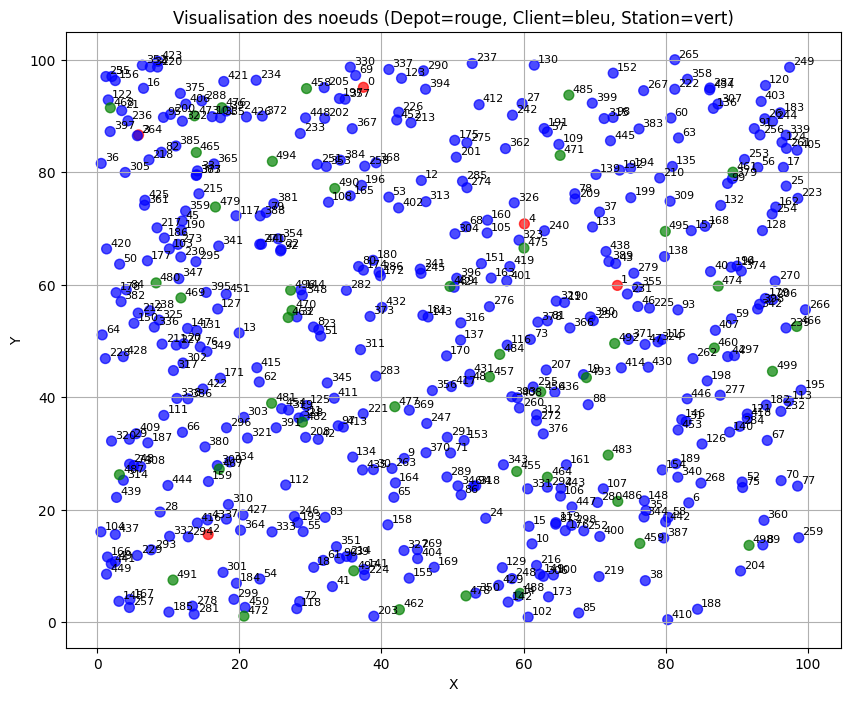

In [10]:
# Bloc 1 : imports pour visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Bloc 2 : visualisation simple des noeuds sur le plan 2D
plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)
for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)
plt.title("Visualisation des noeuds (Depot=rouge, Client=bleu, Station=vert)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [11]:
# Bloc 3 : statistiques descriptives
df_nodes.describe()


NodeID           X           Y      Demand
count  500.000000  500.000000  500.000000  500.000000
mean   249.500000   46.746643   51.304668    4.518000
std    144.481833   29.675855   28.592483    2.924857
min      0.000000    0.506158    0.463202    0.000000
25%    124.750000   18.386079   26.661374    2.000000
50%    249.500000   45.716144   52.308163    4.000000
75%    374.250000   71.929356   75.876224    7.000000
max    499.000000   99.663684   99.971767    9.000000

/tmp/ipython-input-2464252814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_nodes, x='Type', palette=colors)


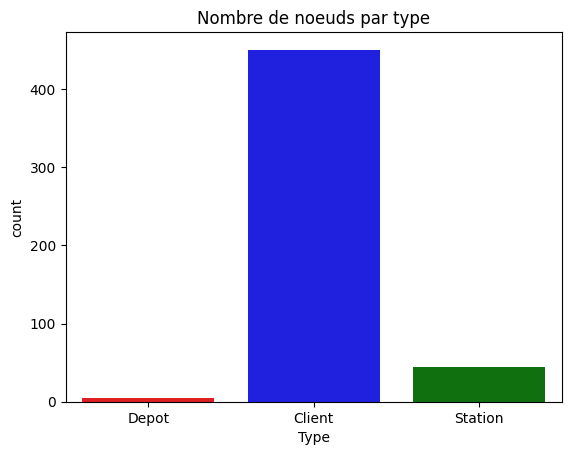

In [12]:
# Bloc 4 : distribution des types de noeuds
sns.countplot(data=df_nodes, x='Type', palette=colors)
plt.title("Nombre de noeuds par type")
plt.show()


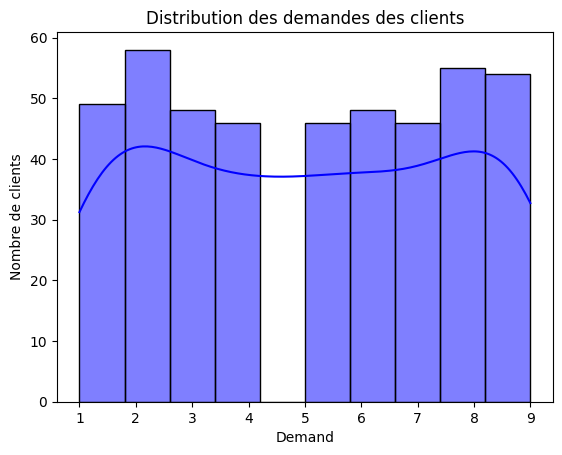

In [13]:
# Bloc 5 : distribution des demandes pour les clients
sns.histplot(df_nodes[df_nodes['Type']=='Client']['Demand'], bins=10, kde=True, color='blue')
plt.title("Distribution des demandes des clients")
plt.xlabel("Demand")
plt.ylabel("Nombre de clients")
plt.show()


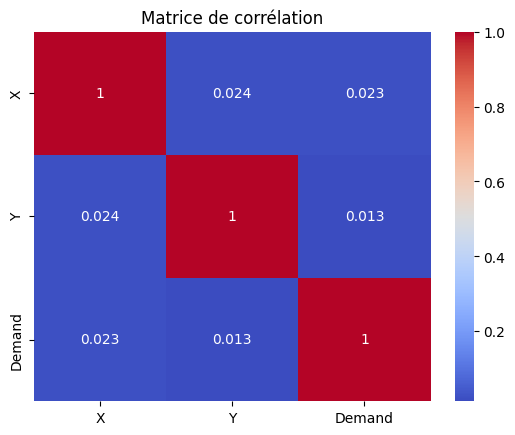

In [14]:
# Bloc 6 : matrice de corrélation (utile si on ajoute d'autres variables)
corr = df_nodes[['X','Y','Demand']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


définir le dépôt commun pour tous les algorithmes
# On fixe le premier dépôt comme point de départ


In [17]:

common_depot = df_nodes[df_nodes['Type']=='Depot'].iloc[0]
common_depot_id = common_depot['NodeID']


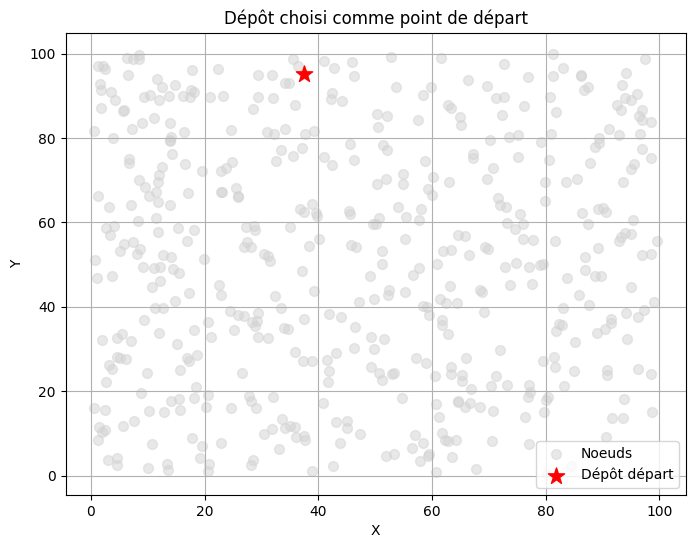

In [19]:
# Bloc : visualiser le dépôt choisi
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df_nodes['X'], df_nodes['Y'], c='lightgray', s=50, alpha=0.5, label='Noeuds')
plt.scatter(common_depot['X'], common_depot['Y'], c='red', s=150, marker='*', label='Dépôt départ')

plt.title("Dépôt choisi comme point de départ")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


#on applique le NN(nearest neighbor) Rayen Ameur

Route Nearest Neighbor : [np.int64(0), 69, 330, 205, 197, 357, 202, 448, 233, 251, 353, 384, 258, 368, 196, 165, 108, 381, 79, 388, 117, 341, 295, 230, 103, 273, 186, 217, 190, 45, 359, 215, 377, 363, 33, 365, 385, 82, 218, 305, 36, 397, 236, 21, 122, 156, 5, 235, 352, 34, 220, 423, 16, 375, 406, 288, 101, 335, 392, 426, 372, 234, 421, 322, 200, 95, 264, 425, 361, 420, 50, 177, 347, 395, 451, 127, 131, 147, 20, 227, 211, 336, 325, 238, 212, 150, 382, 178, 84, 64, 228, 428, 317, 302, 76, 349, 171, 422, 386, 338, 111, 66, 380, 300, 334, 159, 310, 7, 427, 364, 333, 193, 246, 55, 83, 351, 90, 214, 39, 141, 224, 41, 18, 61, 72, 118, 450, 299, 184, 301, 54, 278, 281, 185, 257, 167, 145, 449, 441, 49, 166, 437, 104, 439, 314, 243, 74, 308, 187, 409, 29, 320, 444, 28, 332, 294, 416, 433, 293, 229, 112, 208, 42, 97, 413, 221, 411, 345, 125, 11, 328, 319, 454, 391, 321, 296, 303, 62, 415, 13, 32, 8, 23, 51, 311, 283, 369, 247, 291, 153, 71, 370, 9, 263, 164, 65, 158, 327, 269, 404, 169, 155, 203

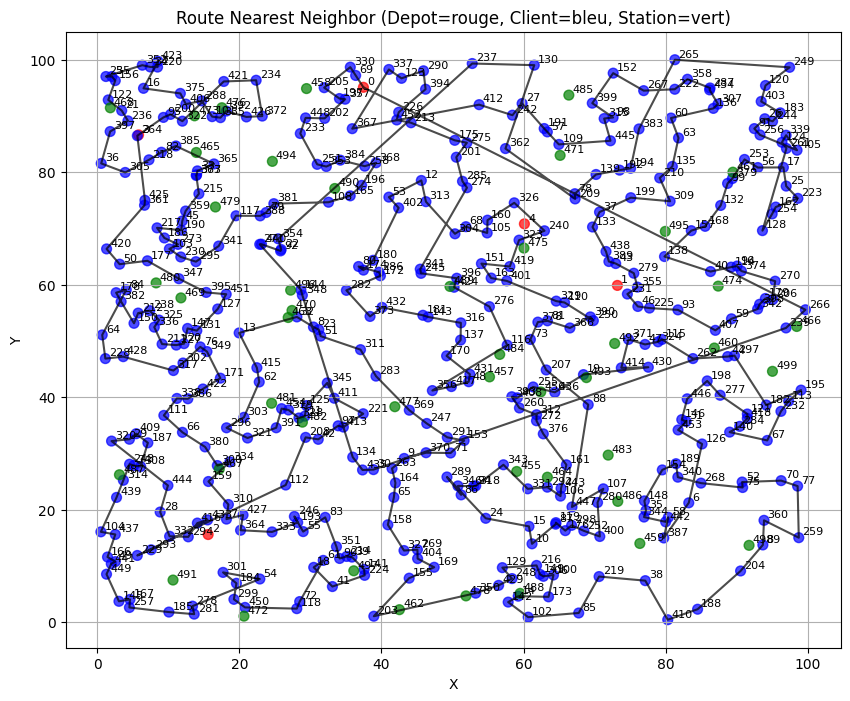

In [18]:
# Bloc : préparer les clients à visiter pour NN
clients_set_nn = set(df_nodes[df_nodes['Type']=='Client']['NodeID'].tolist())

# Bloc : dictionnaire des coordonnées
coords_dict = df_nodes.set_index('NodeID')[['X','Y']].to_dict('index')

# Bloc : fonction distance euclidienne
def euclidean_distance(a, b):
    return np.linalg.norm(np.array([a['X'], a['Y']]) - np.array([b['X'], b['Y']]))

# Bloc : Algorithme Nearest Neighbor
def nearest_neighbor(start_id, unvisited_nodes):
    route = [start_id]
    current_node = start_id
    unvisited = unvisited_nodes.copy()

    while unvisited:
        nearest = min(unvisited, key=lambda x: euclidean_distance(coords_dict[current_node], coords_dict[x]))
        route.append(nearest)
        current_node = nearest
        unvisited.remove(nearest)

    route.append(start_id)  # retour au dépôt
    return route

# Bloc : appliquer NN
nn_route = nearest_neighbor(common_depot_id, clients_set_nn)
print("Route Nearest Neighbor :", nn_route)

# Bloc : visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)

# tracer le chemin du NN
route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in nn_route])
plt.plot(route_coords[:,0], route_coords[:,1], 'k-', linewidth=1.5, alpha=0.7)

# afficher les IDs des noeuds
for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Route Nearest Neighbor (Depot=rouge, Client=bleu, Station=vert)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


#on applique le Route Clark & Wight - Rami ben atig

Route Clarke & Wright : [np.int64(0), 188, 410, np.int64(0)]


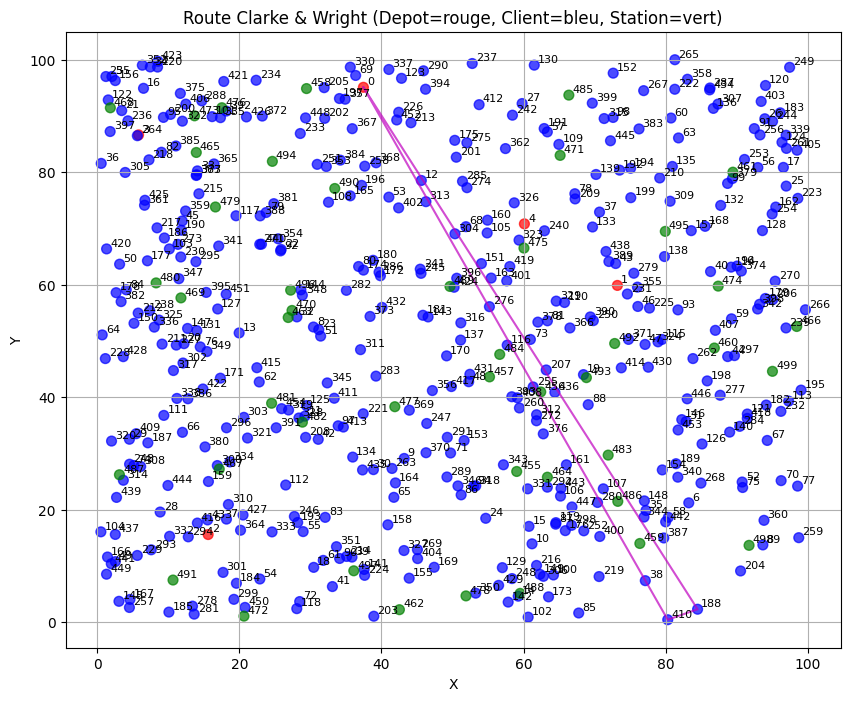

In [21]:
# Bloc 1 : préparation
clients = df_nodes[df_nodes['Type']=='Client'].copy()
depot_coords = coords_dict[common_depot_id]

# calculer toutes les distances entre noeuds
def distance(a_id, b_id):
    a = coords_dict[a_id]
    b = coords_dict[b_id]
    return euclidean_distance(a, b)

# Bloc 2 : calcul des savings
savings = []
client_ids = clients['NodeID'].tolist()

for i in client_ids:
    for j in client_ids:
        if i < j:  # éviter doublons
            save = distance(common_depot_id, i) + distance(common_depot_id, j) - distance(i, j)
            savings.append((i, j, save))

# trier les savings par ordre décroissant
savings.sort(key=lambda x: x[2], reverse=True)

# Bloc 3 : initialiser une route par client
routes = {i:[common_depot_id, i, common_depot_id] for i in client_ids}

# Bloc 4 : fusionner les routes selon les savings
for i, j, s in savings:
    route_i = None
    route_j = None
    for r in routes.values():
        if r[1] == i and r[-2] == i:
            route_i = r
        if r[1] == j and r[-2] == j:
            route_j = r
    if route_i is not None and route_j is not None and route_i != route_j:
        # fusionner en une seule route
        new_route = route_i[:-1] + route_j[1:]
        # supprimer anciennes routes
        keys_to_remove = [k for k,v in routes.items() if v == route_i or v == route_j]
        for k in keys_to_remove:
            routes.pop(k)
        # ajouter nouvelle route
        routes[new_route[1]] = new_route

# Bloc 5 : obtenir la route finale (pour visualisation, on prend la première fusionnée)
cw_route = list(routes.values())[0]
print("Route Clarke & Wright :", cw_route)
# Bloc 6 : visualisation de la route Clarke & Wright
plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)

route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in cw_route])
plt.plot(route_coords[:,0], route_coords[:,1], 'm-', linewidth=1.5, alpha=0.7)

# afficher les IDs des noeuds
for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Route Clarke & Wright (Depot=rouge, Client=bleu, Station=vert)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#on applique maintenant Route Simulated Annealing - Sarra Laabidi

Route Simulated Annealing : [np.int64(0), 97, 351, 432, 128, 232, 239, 304, 317, 243, 127, 49, 174, 103, 117, 302, 51, 139, 240, 352, 36, 200, 165, 300, 428, 377, 335, 392, 434, 254, 12, 426, 388, 101, 62, 303, 176, 284, 206, 260, 272, 73, 362, 355, 19, 389, 135, 267, 56, 425, 21, 235, 136, 111, 167, 145, 449, 39, 28, 191, 225, 63, 261, 138, 168, 209, 156, 305, 134, 247, 42, 349, 71, 413, 234, 84, 131, 236, 406, 212, 439, 301, 185, 48, 329, 290, 152, 451, 186, 201, 407, 258, 78, 210, 5, 273, 187, 74, 298, 70, 417, 43, 374, 96, 194, 309, 157, 414, 291, 344, 148, 10, 126, 173, 424, 80, 144, 217, 159, 310, 369, 312, 99, 220, 322, 341, 150, 285, 241, 133, 77, 88, 408, 409, 347, 396, 47, 436, 46, 154, 360, 265, 339, 438, 140, 52, 313, 181, 316, 308, 76, 246, 112, 333, 54, 32, 363, 372, 375, 41, 169, 252, 404, 83, 158, 192, 326, 160, 179, 244, 223, 175, 421, 177, 178, 402, 114, 342, 430, 90, 184, 299, 281, 263, 328, 224, 214, 319, 207, 116, 94, 444, 334, 193, 403, 379, 123, 452, 213, 108, 23

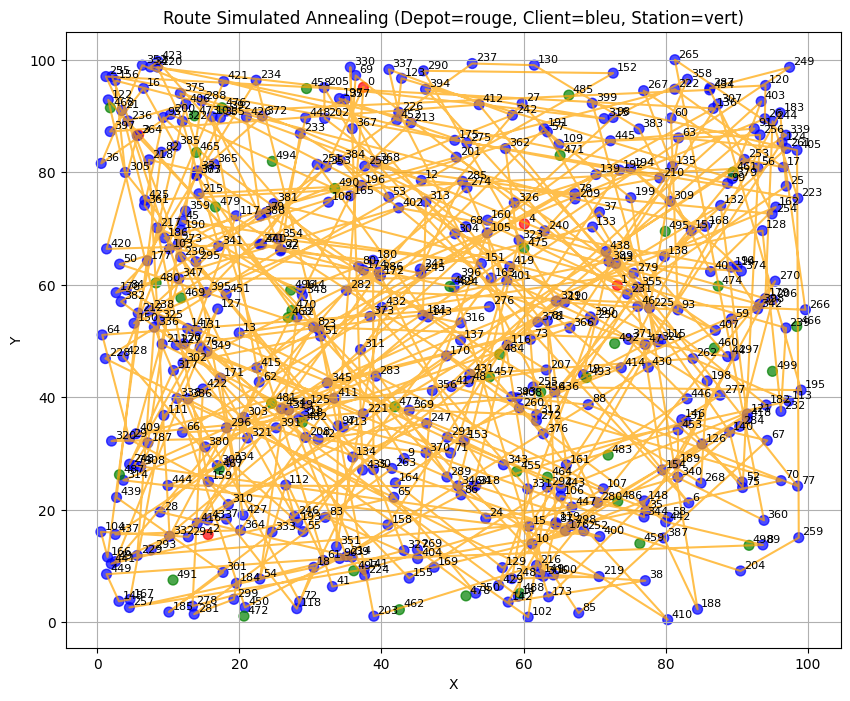

In [23]:
# Bloc 1 : préparation
clients = df_nodes[df_nodes['Type']=='Client'].copy()
client_ids = clients['NodeID'].tolist()

# fonction pour calculer la distance totale d'une route
def total_distance(route):
    dist = 0
    for i in range(len(route)-1):
        dist += distance(route[i], route[i+1])
    return dist

# Bloc 2 : initialisation
current_route = [common_depot_id] + client_ids + [common_depot_id]
current_distance = total_distance(current_route)
best_route = current_route.copy()
best_distance = current_distance

# paramètres SA
T = 1000       # température initiale
alpha = 0.995  # taux de refroidissement
n_iter = 2000  # nombre d'itérations

# Bloc 3 : boucle Simulated Annealing
np.random.seed(42)
for _ in range(n_iter):
    # générer une nouvelle solution en permutant deux clients
    new_route = current_route.copy()
    i, j = np.random.choice(range(1, len(new_route)-1), size=2, replace=False)
    new_route[i], new_route[j] = new_route[j], new_route[i]

    new_distance = total_distance(new_route)
    delta = new_distance - current_distance

    # accepter la nouvelle solution si meilleure ou avec probabilité selon T
    if delta < 0 or np.random.rand() < np.exp(-delta / T):
        current_route = new_route
        current_distance = new_distance
        if current_distance < best_distance:
            best_route = current_route.copy()
            best_distance = current_distance

    # refroidir
    T *= alpha

sa_route = best_route
print("Route Simulated Annealing :", sa_route)
print("Distance totale :", best_distance)
# Bloc 4 : visualisation route Simulated Annealing
plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)

route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in sa_route])
plt.plot(route_coords[:,0], route_coords[:,1], 'orange', linewidth=1.5, alpha=0.7)

for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Route Simulated Annealing (Depot=rouge, Client=bleu, Station=vert)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# on applique maintenant le Route Tabu Search - Aziz Sfar

Route Tabu Search : [np.int64(0), 323, 408, 15, 10, 219, 9, 181, 153, 376, 90, 351, 263, 134, 82, 16, 322, 271, 348, 341, 304, 195, 151, 32, 391, 29, 228, 64, 45, 218, 233, 251, 137, 431, 38, 248, 149, 400, 148, 19, 168, 374, 96, 52, 453, 272, 51, 127, 334, 269, 169, 327, 399, 124, 56, 99, 98, 130, 426, 420, 178, 13, 285, 122, 406, 372, 290, 355, 350, 74, 243, 416, 28, 147, 264, 95, 283, 356, 86, 155, 216, 173, 393, 107, 312, 297, 59, 279, 390, 163, 366, 133, 274, 12, 362, 53, 230, 190, 335, 236, 375, 325, 371, 115, 179, 206, 378, 93, 132, 389, 265, 91, 17, 14, 142, 119, 292, 280, 373, 108, 174, 160, 196, 432, 247, 324, 40, 254, 26, 183, 244, 222, 136, 287, 110, 113, 140, 121, 47, 250, 88, 333, 61, 427, 170, 255, 260, 48, 87, 126, 442, 100, 102, 404, 224, 257, 145, 185, 364, 62, 164, 18, 176, 85, 306, 141, 41, 94, 331, 417, 282, 22, 451, 440, 450, 129, 429, 189, 446, 443, 65, 301, 332, 203, 106, 24, 207, 139, 192, 199, 114, 37, 412, 237, 394, 68, 78, 172, 291, 360, 77, 70, 268, 411, 12

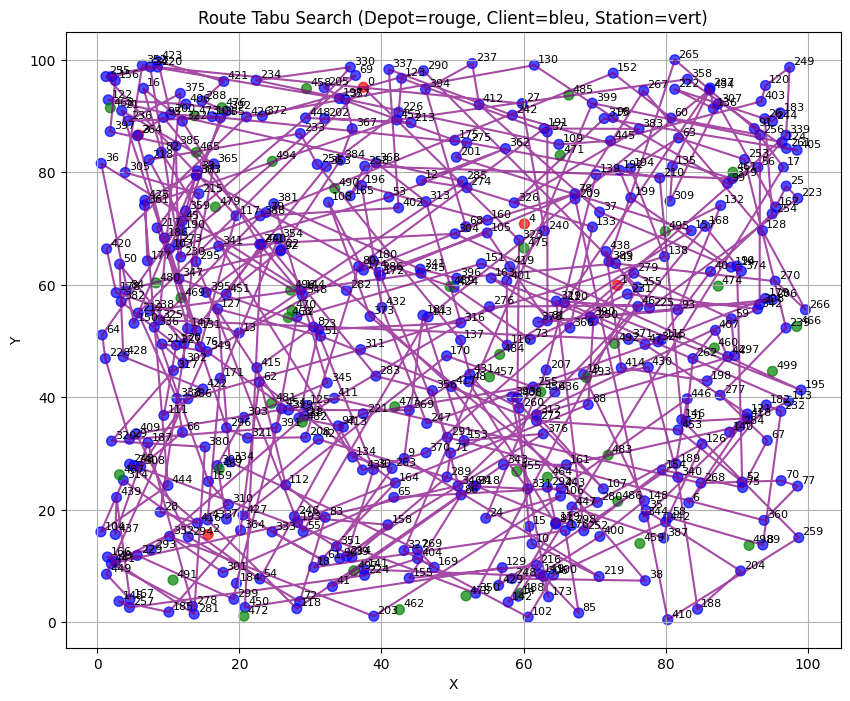

In [25]:
# Bloc 1 : préparation
clients = df_nodes[df_nodes['Type']=='Client'].copy()
client_ids = clients['NodeID'].tolist()

# fonction pour calculer la distance totale d'une route
def total_distance(route):
    dist = 0
    for i in range(len(route)-1):
        dist += distance(route[i], route[i+1])
    return dist

# Bloc 2 : initialisation
current_route = [common_depot_id] + client_ids + [common_depot_id]
best_route = current_route.copy()
best_distance = total_distance(best_route)

tabu_list = []
tabu_size = 50   # taille maximale de la liste tabu
n_iter = 1000    # nombre d'itérations

np.random.seed(42)

# Bloc 3 : boucle Tabu Search
for _ in range(n_iter):
    # générer voisins en permutant deux clients
    neighbors = []
    for _ in range(20):  # générer 20 voisins
        new_route = current_route.copy()
        i, j = np.random.choice(range(1, len(new_route)-1), size=2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        move = (min(new_route[i], new_route[j]), max(new_route[i], new_route[j]))
        if move not in tabu_list:
            neighbors.append((new_route, move))

    # choisir le meilleur voisin
    if neighbors:
        neighbor_routes = [(r, total_distance(r), m) for r, m in neighbors]
        neighbor_routes.sort(key=lambda x: x[1])
        best_neighbor, best_neighbor_distance, best_move = neighbor_routes[0]

        # mettre à jour la route courante
        current_route = best_neighbor
        # mettre à jour la liste tabu
        tabu_list.append(best_move)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        # mettre à jour la meilleure solution globale
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor.copy()
            best_distance = best_neighbor_distance

tabu_route = best_route
print("Route Tabu Search :", tabu_route)
print("Distance totale :", best_distance)

# Bloc 4 : visualisation route Tabu Search
plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)

route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in tabu_route])
plt.plot(route_coords[:,0], route_coords[:,1], 'purple', linewidth=1.5, alpha=0.7)

for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Route Tabu Search (Depot=rouge, Client=bleu, Station=vert)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#on applique maintenant le Route DP -Linda Ismail

Route DP (sous-ensemble 10 clients) : [np.int64(0), 12, 6, 10, 14, 9, 7, 11, 8, 13, 5, np.int64(0)]


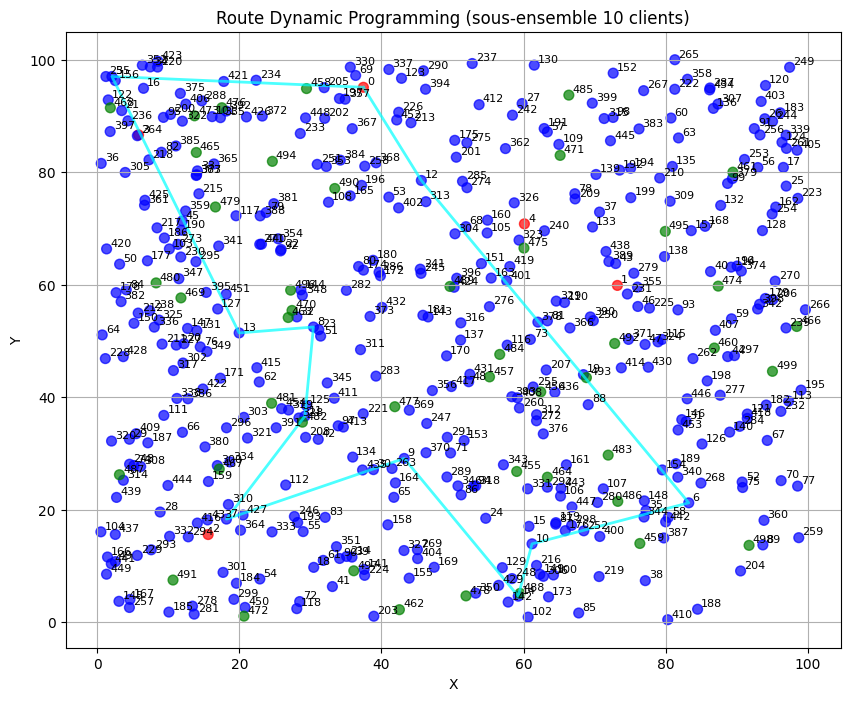

In [29]:
# Bloc 1 : réduire le nombre de clients pour DP
dp_client_ids = df_nodes[df_nodes['Type']=='Client']['NodeID'].tolist()[:10]  # 10 clients pour démo
nodes_dp = [common_depot_id] + dp_client_ids
n = len(nodes_dp)

# Bloc 2 : matrice de distances pour DP
dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dist_matrix[i,j] = distance(nodes_dp[i], nodes_dp[j])

# Bloc 3 : programmation dynamique (Held-Karp)
# dp[mask][i] = distance minimale pour visiter les noeuds dans mask et terminer à i
dp = {}
parent = {}

# initialisation
for i in range(1, n):
    dp[(1 << i, i)] = dist_matrix[0, i]  # distance du dépôt au client i
    parent[(1 << i, i)] = 0

# itérer sur tous les sous-ensembles de clients
for r in range(2, n):
    for subset in [s for s in range(1, 1<<n) if bin(s).count('1') == r and (s & 1) == 0]:
        for j in range(1, n):
            if not (subset & (1 << j)):
                continue
            prev_subset = subset ^ (1 << j)
            candidates = []
            for k in range(1, n):
                if prev_subset & (1 << k):
                    candidates.append((dp[(prev_subset, k)] + dist_matrix[k,j], k))
            dp[(subset, j)], parent[(subset, j)] = min(candidates)

# Bloc 4 : reconstruire la route optimale
full_mask = (1 << n) - 2  # tous les clients (exclure dépôt)
last = min([(dp[(full_mask, j)] + dist_matrix[j,0], j) for j in range(1,n)])[1]

mask = full_mask
route_dp = [0, last]

while mask:
    prev = parent[(mask, last)]
    mask = mask ^ (1 << last)
    last = prev
    if last != 0:
        route_dp.insert(1, last)

# convertir les indices DP vers NodeID
dp_route = [nodes_dp[i] for i in route_dp] + [common_depot_id]  # retour au dépôt
print("Route DP (sous-ensemble 10 clients) :", dp_route)

# Bloc 5 : visualisation route DP
plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)

route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in dp_route])
plt.plot(route_coords[:,0], route_coords[:,1], 'cyan', linewidth=2, alpha=0.7)

for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Route Dynamic Programming (sous-ensemble 10 clients)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#on applique maintenant Route Genetic Algorithm - Sameh Rebhi

Route Genetic Algorithm : [np.int64(0), 392, 421, 152, 162, 219, 370, 65, 428, 62, 51, 422, 425, 405, 210, 341, 367, 242, 353, 132, 212, 185, 116, 390, 323, 92, 71, 31, 106, 146, 418, 17, 183, 339, 412, 325, 440, 101, 391, 97, 320, 449, 167, 423, 156, 377, 322, 375, 230, 39, 15, 77, 450, 248, 149, 140, 115, 239, 250, 88, 411, 134, 364, 327, 289, 29, 299, 381, 330, 33, 295, 451, 267, 237, 356, 70, 142, 203, 408, 161, 387, 266, 170, 10, 343, 260, 434, 256, 394, 226, 265, 386, 444, 49, 246, 7, 435, 85, 83, 23, 383, 192, 105, 407, 69, 385, 227, 293, 76, 415, 127, 416, 104, 190, 36, 228, 336, 166, 61, 429, 48, 311, 193, 321, 359, 253, 261, 300, 380, 294, 331, 126, 279, 32, 309, 255, 141, 55, 424, 319, 158, 187, 9, 200, 251, 452, 147, 338, 314, 90, 169, 47, 285, 202, 197, 37, 414, 436, 157, 268, 306, 155, 220, 406, 34, 363, 81, 143, 372, 130, 28, 42, 144, 223, 342, 270, 135, 163, 282, 346, 41, 280, 93, 46, 11, 174, 56, 114, 139, 337, 288, 178, 79, 432, 186, 218, 305, 264, 296, 352, 122, 334,

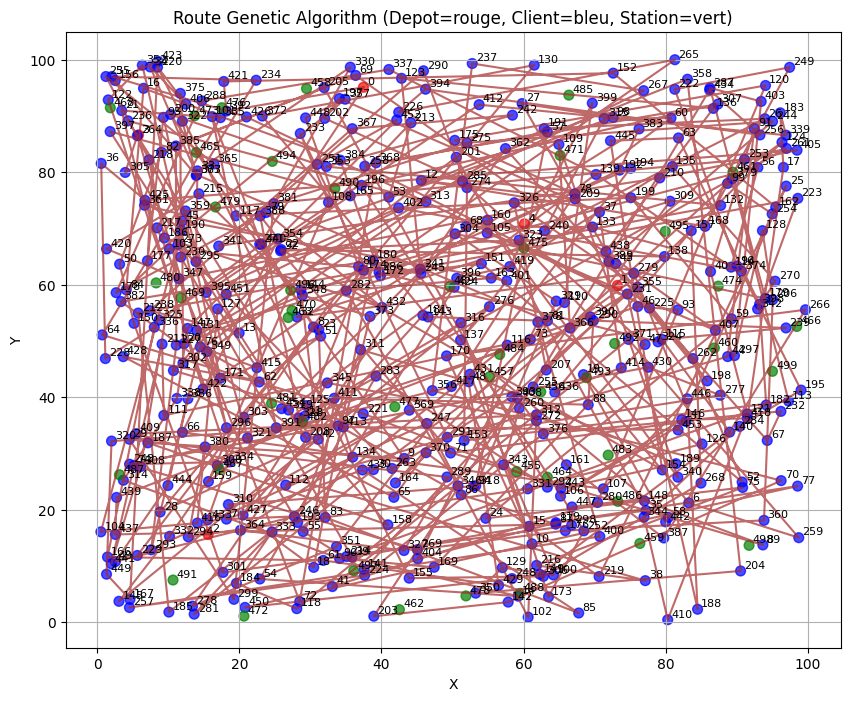

In [34]:
# Bloc 1 : préparation
import numpy as np
import random
import matplotlib.pyplot as plt

# liste des clients
clients = df_nodes[df_nodes['Type']=='Client'].copy()
client_ids = clients['NodeID'].tolist()

# fonction distance totale pour une route
def total_distance(route):
    dist = 0
    for i in range(len(route)-1):
        dist += distance(route[i], route[i+1])
    return dist

# Bloc 2 : paramètres GA
pop_size = 50       # taille de la population
n_gen = 200         # nombre de générations
mutation_rate = 0.2 # taux de mutation

np.random.seed(42)
random.seed(42)

# Bloc 3 : initialiser population
population = []
for _ in range(pop_size):
    route = client_ids.copy()
    random.shuffle(route)
    route = [common_depot_id] + route + [common_depot_id]
    population.append(route)

# Bloc 4 : fonctions crossover et mutation
def crossover(parent1, parent2):
    # ordre de crossover (Order Crossover)
    size = len(parent1) - 2
    a, b = sorted(random.sample(range(1, size+1), 2))
    child = [common_depot_id] + parent1[a:b+1] + [i for i in parent2[1:-1] if i not in parent1[a:b+1]] + [common_depot_id]
    return child

def mutate(route):
    if random.random() < mutation_rate:
        i, j = random.sample(range(1, len(route)-1), 2)
        route[i], route[j] = route[j], route[i]
    return route

# Bloc 5 : boucle GA
for gen in range(n_gen):
    # évaluer la population
    fitness = [total_distance(r) for r in population]
    sorted_pop = [r for _,r in sorted(zip(fitness, population), key=lambda x:x[0])]

    # sélectionner les meilleurs (elitisme)
    population = sorted_pop[:pop_size//2]

    # créer nouveaux enfants par crossover + mutation
    children = []
    while len(children) < pop_size//2:
        p1, p2 = random.sample(population, 2)
        child = crossover(p1, p2)
        child = mutate(child)
        children.append(child)

    population += children

# meilleure solution après GA
ga_route = min(population, key=total_distance)
print("Route Genetic Algorithm :", ga_route)
print("Distance totale :", total_distance(ga_route))

# Bloc 6 : visualisation route GA
plt.figure(figsize=(10,8))
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.7)

route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in ga_route])
plt.plot(route_coords[:,0], route_coords[:,1], 'brown', linewidth=1.5, alpha=0.7)

for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Route Genetic Algorithm (Depot=rouge, Client=bleu, Station=vert)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#on compare les 6 routes

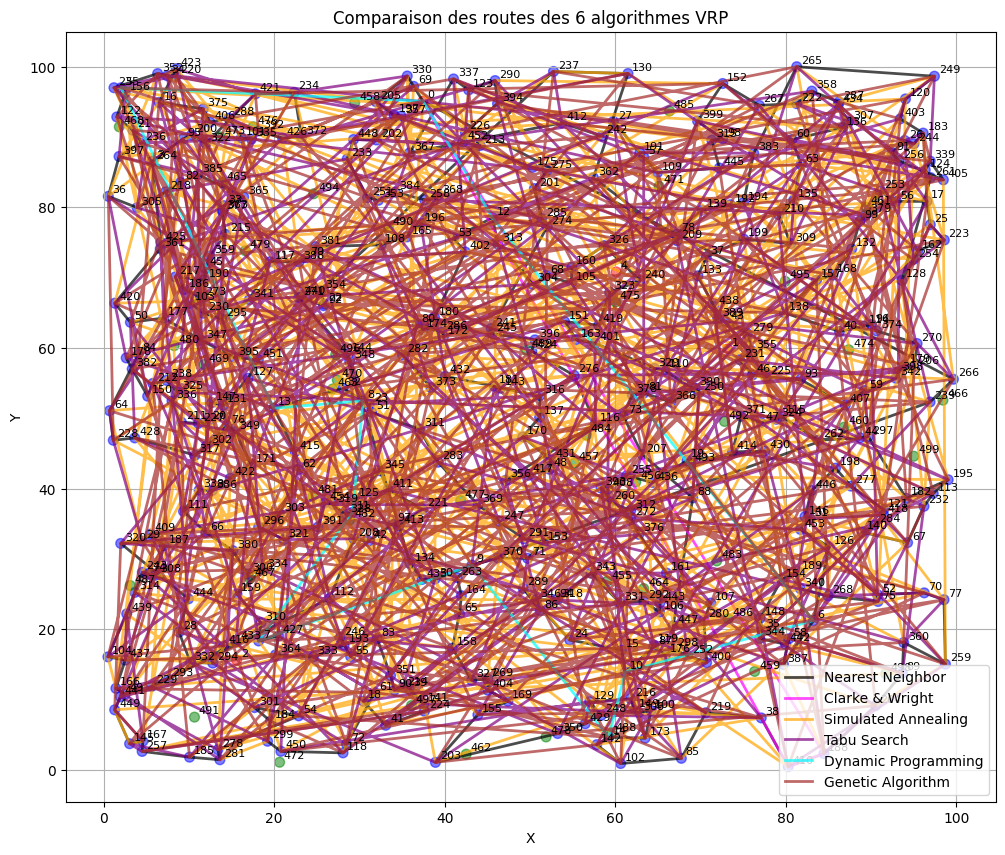

In [35]:
plt.figure(figsize=(12,10))

# couleurs par type de noeud
colors = {'Depot':'red', 'Client':'blue', 'Station':'green'}
plt.scatter(df_nodes['X'], df_nodes['Y'], c=df_nodes['Type'].map(colors), s=50, alpha=0.5)

# définir les routes et couleurs pour la légende
all_routes = {
    'Nearest Neighbor': (nn_route, 'black'),
    'Clarke & Wright': (cw_route, 'magenta'),
    'Simulated Annealing': (sa_route, 'orange'),
    'Tabu Search': (tabu_route, 'purple'),
    'Dynamic Programming': (dp_route, 'cyan'),
    'Genetic Algorithm': (ga_route, 'brown')
}

# tracer chaque route
for name, (route, color) in all_routes.items():
    route_coords = np.array([[coords_dict[node]['X'], coords_dict[node]['Y']] for node in route])
    plt.plot(route_coords[:,0], route_coords[:,1], color=color, linewidth=2, alpha=0.7, label=name)

# ajouter les IDs des noeuds
for i, row in df_nodes.iterrows():
    plt.text(row['X']+0.5, row['Y']+0.5, str(row['NodeID']), fontsize=8)

plt.title("Comparaison des routes des 6 algorithmes VRP")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


#meilleur algorithme ayant la meilleur route ??

In [36]:
# Calculer la distance totale pour chaque algorithme
distances = {
    'Nearest Neighbor': total_distance(nn_route),
    'Clarke & Wright': total_distance(cw_route),
    'Simulated Annealing': total_distance(sa_route),
    'Tabu Search': total_distance(tabu_route),
    'Dynamic Programming': total_distance(dp_route),
    'Genetic Algorithm': total_distance(ga_route)
}

# afficher les distances
for algo, dist in distances.items():
    print(f"{algo}: {dist:.2f}")

# trouver le meilleur (distance minimale)
best_algo = min(distances, key=distances.get)
print(f"\nLe meilleur algorithme est : {best_algo} avec une distance totale de {distances[best_algo]:.2f}")


Nearest Neighbor: 1918.94
Clarke & Wright: 212.44
Simulated Annealing: 14383.08
Tabu Search: 9016.25
Dynamic Programming: 308.40
Genetic Algorithm: 15254.72

Le meilleur algorithme est : Clarke & Wright avec une distance totale de 212.44
